# Section 5 - Improving nowcasting and forecasting models through the Information Imbalance

## 5.1 - Data frequency selection

In [24]:
%reset -f

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from dadapy import Data

In [25]:
NUM_COLORS2 = 4
cm = plt.get_cmap('Set3')
color_scale = [cm(1.*i/NUM_COLORS2) for i in range(NUM_COLORS2)]

NameError: name 'plt' is not defined

In [9]:
files = ["../Data/daily_data.txt", "../Data/weekly_data.txt", "../Data/biweekly_data.txt", "../Data/monthly_data.txt"]
file_labels = ["Daily", "Weekly", "Biweekly", "Monthly"]

X_labels = np.array(['GPR', 'VSTOXX', 'Unc. EUR/USD', 'Unc. EUR/JPY', 'Unc. EUR/GBP', 'Unc. EUR/CHF',
       'Natural Gas', 'Elec. price SPAIN', 'Elec. price GER', 'Elec. price IT',
       'Elec. price FR', 'Brent Oil', 'Coal', 'Gold', 'EUR/USD Spot',
       'EUR/JPY Spot', 'EUR/GBP Spot', 'EUR/CHF Spot',
       'Bloom. Energy price index', 'Solactive ESG fossil index',
       'S&P Euro50 Env. index', 'MSCI EU Energy sec. index', 'ERIX index', 'EUROnext100', 'IBEX35', 'DAX',
       'CAC', 'FTSEmib', 'EUROSTOXX. Elect. index', '10 Year Bond yield', '3 Month Bond Yield',
       'Inflation', 'GDP'])

In [10]:
data_sets = []

for file in files:
    data = np.genfromtxt(file)
    data_sets.append(data)

ds_target = []

ds_X = []

for data in data_sets:
    target_d = data[:, 0][:, None]
    d_t = Data(target_d+np.random.normal(0, 1e-3, size=target_d.shape), maxk = target_d.shape[0]-1 )
    d_t.compute_distances()

    ds_target.append(d_t)

    X = data[:, 1:]
    d_X = Data(X+np.random.normal(0, 1e-3, size=X.shape), maxk = X.shape[0]-1 )
    d_X.compute_distances() 
    ds_X.append(d_X)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float

In [11]:
best_sets_list = []
best_imbs_list = []
all_imbs_list = []

for d_t, d_X in zip(ds_target, ds_X):

    best_sets, best_imbs, all_imbs = d_X.greedy_feature_selection_target(target_ranks = d_t.dist_indices, 
                                          n_coords=31, k = 1, n_best=1, symm = False)
    best_sets_list.append(best_sets)
    best_imbs_list.append(best_imbs)
    all_imbs_list.append(all_imbs)

total number of computations is:  33
total number of computations is:  32
total number of computations is:  31
total number of computations is:  30
total number of computations is:  29
total number of computations is:  28
total number of computations is:  27
total number of computations is:  26
total number of computations is:  25
total number of computations is:  24
total number of computations is:  23
total number of computations is:  22
total number of computations is:  21
total number of computations is:  20
total number of computations is:  19
total number of computations is:  18
total number of computations is:  17
total number of computations is:  16
total number of computations is:  15
total number of computations is:  14
total number of computations is:  13
total number of computations is:  12
total number of computations is:  11
total number of computations is:  10
total number of computations is:  9
total number of computations is:  8
total number of computations is:  7
tota

In [12]:
data_weekly = np.genfromtxt(files[1])
target_w = []
X_w = []

target_w = data_weekly[:, 0][:, None]
X_w = data_weekly[:, 1:]

X_w = pd.DataFrame(X, columns=X_labels)
X_w = X_w.to_numpy(dtype=np.float64)[:,]

d_t_w = Data(target_w+np.random.normal(0, 1e-3, size=target_w.shape), maxk = target_w.shape[0]-1)
d_t_w.compute_distances()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


In [13]:
x = list(range(0,33,1))

np.random.seed(18)
for t in range(1,11):
    for _ in range(1,11):
        sample = random.sample(x, _)

In [14]:
mean_imb = np.zeros((10,10))
np.random.seed(18)
for t in range(1,11):
    for i in range(1,11):
        sample = random.sample(x, i)
        X_w_random = X_w[:,sample]
        d_X_random = Data(X_w_random+np.random.normal(0, 1e-3, size=X_w_random.shape), maxk = X_w_random.shape[0]-1)
        d_X_random.compute_distances()
        sing_imbalances = d_X_random.return_inf_imb_target_selected_coords(target_ranks = d_t.dist_indices, coord_list=[np.arange(i)], k = 1)
        mean_imb[t-1,i-1] = sing_imbalances[1]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float

total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float

total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float

total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float

total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float

total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float

total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float

total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1
total number of computations is:  1


In [15]:
mean_imb = np.mean(mean_imb, axis=0)

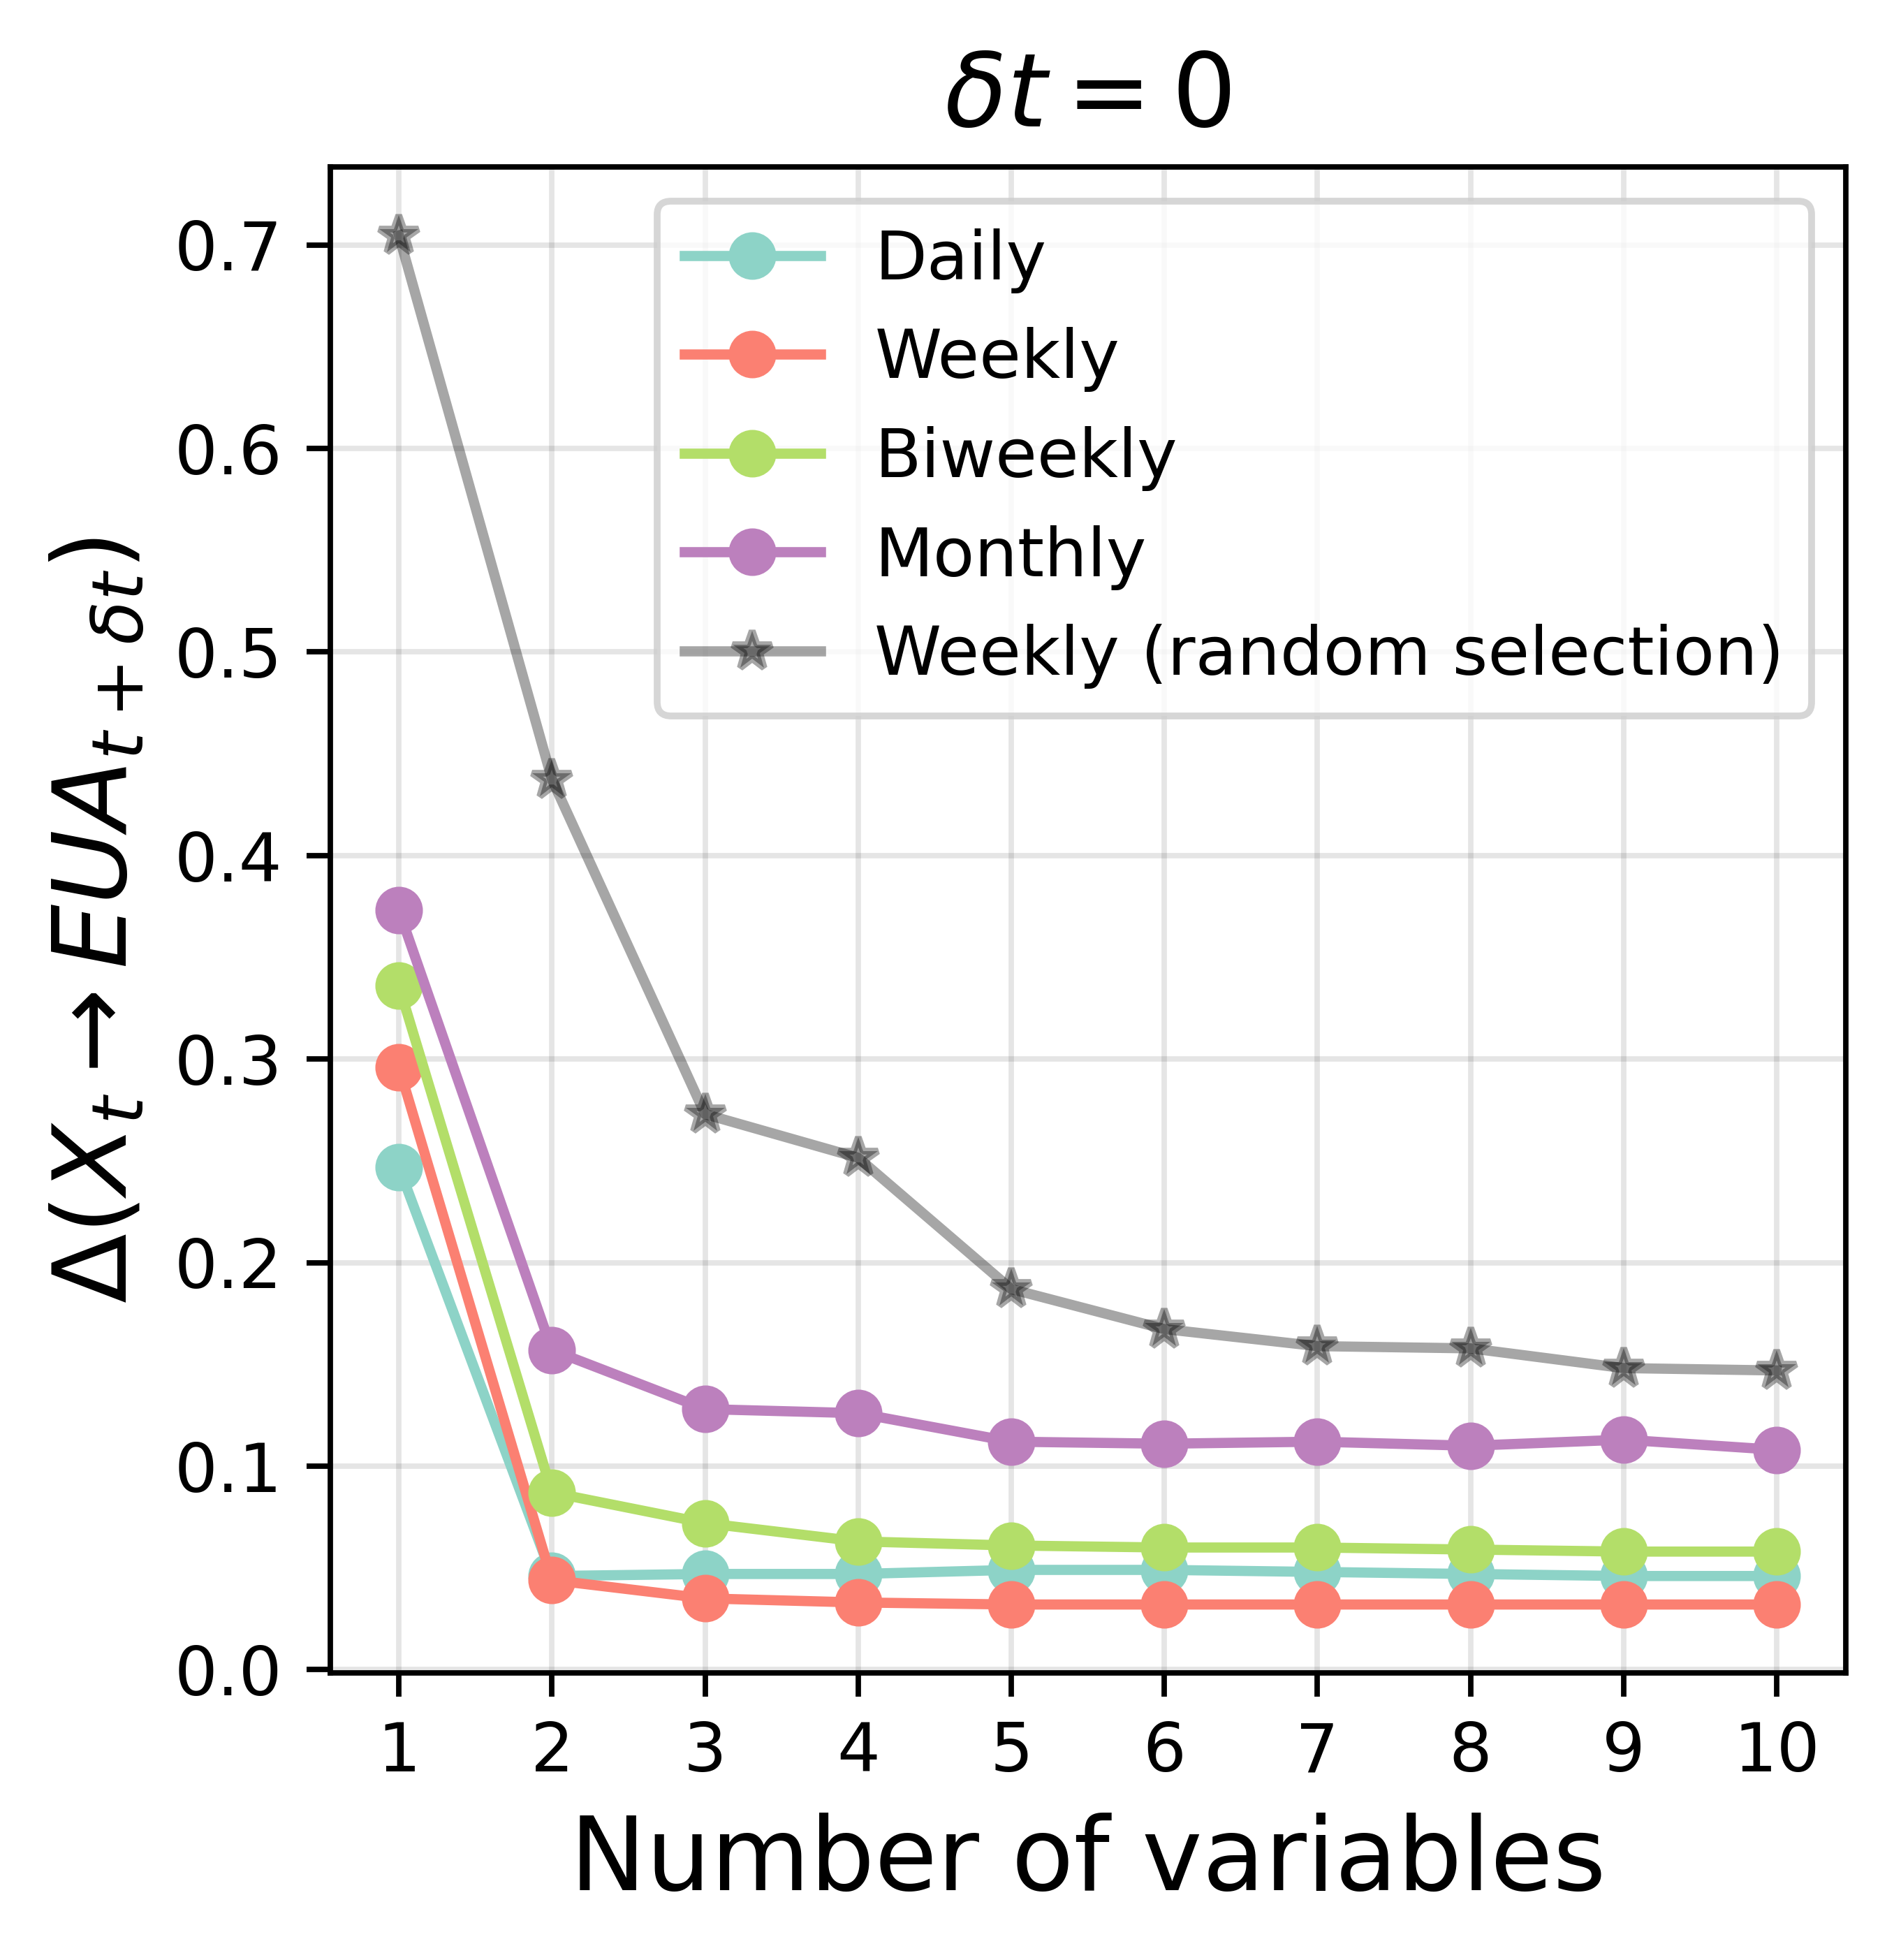

<Figure size 640x480 with 0 Axes>

In [16]:
fig, ax = plt.subplots(figsize=(4, 4), dpi = 700)
for i, best_imbs in enumerate(best_imbs_list):
    plt.plot(np.arange(1, 11, 1), best_imbs[0:10, 1], "-o", label = file_labels[i], color = color_scale[i])
plt.plot(np.arange(1, 11, 1), mean_imb, '*-', color='black', label="Weekly (random selection)", alpha=0.35)
plt.legend()
plt.xlabel("Number of variables", fontsize = 15)
plt.ylabel(r'$\Delta(X_{t}\rightarrow EUA_{t+\delta t})$', fontsize = 15)
plt.title(r'$\delta t = 0$', fontsize=15)
plt.grid(axis='both',color="black", alpha=.1)
ax.set_xticks(np.arange(1, 11, 1))
plt.show()
plt.savefig("../Figures/Fig7_1_1_TimeScaleSelection.pdf")

In [17]:
k = 1

data_sets = []

for file in files:
    data = np.genfromtxt(file)
    data_sets.append(data)

ds_target = []

ds_X = []

n_roll = 1

for data in data_sets:
    target_d = data[:, 0][:, None]
    target_d = np.roll(target_d, -n_roll)[:-n_roll]
    d_t = Data(target_d, maxk = target_d.shape[0]-1 )
    d_t.compute_distances()

    ds_target.append(d_t)

    X = data[:, :]
    X = X[:-n_roll]
    d_X = Data(X, maxk = X.shape[0]-1 )
    d_X.compute_distances() 
    ds_X.append(d_X)

imbalances_1 = []

for d_t, d_X in zip(ds_target, ds_X):

    sing_imbalances = d_X.return_inf_imb_target_all_coords(target_ranks = d_t.dist_indices, k = 1)
    imbalances_1.append(sing_imbalances)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most

total number of computations is:  34


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 d

total number of computations is:  34


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


total number of computations is:  34


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 d

total number of computations is:  34


In [18]:
best_sets_list_2 = []
best_imbs_list_2 = []
all_imbs_list_2 = []

for d_t, d_X in zip(ds_target, ds_X):
    best_sets_2, best_imbs_2, all_imbs_2 = d_X.greedy_feature_selection_target(target_ranks = d_t.dist_indices, 
                                          n_coords=32, k = 1, n_best=1, symm = False)
    best_sets_list_2.append(best_sets_2)
    best_imbs_list_2.append(best_imbs_2)
    all_imbs_list_2.append(all_imbs_2)

total number of computations is:  34


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 d

total number of computations is:  33


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 d

total number of computations is:  32
total number of computations is:  31
total number of computations is:  30
total number of computations is:  29
total number of computations is:  28
total number of computations is:  27
total number of computations is:  26
total number of computations is:  25
total number of computations is:  24
total number of computations is:  23
total number of computations is:  22
total number of computations is:  21
total number of computations is:  20
total number of computations is:  19
total number of computations is:  18
total number of computations is:  17
total number of computations is:  16
total number of computations is:  15
total number of computations is:  14
total number of computations is:  13
total number of computations is:  12
total number of computations is:  11
total number of computations is:  10
total number of computations is:  9
total number of computations is:  8
total number of computations is:  7
total number of computations is:  6
total

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


total number of computations is:  33
total number of computations is:  32
total number of computations is:  31
total number of computations is:  30
total number of computations is:  29
total number of computations is:  28
total number of computations is:  27
total number of computations is:  26
total number of computations is:  25
total number of computations is:  24
total number of computations is:  23
total number of computations is:  22
total number of computations is:  21
total number of computations is:  20
total number of computations is:  19
total number of computations is:  18
total number of computations is:  17
total number of computations is:  16
total number of computations is:  15
total number of computations is:  14
total number of computations is:  13
total number of computations is:  12
total number of computations is:  11
total number of computations is:  10
total number of computations is:  9
total number of computations is:  8
total number of computations is:  7
tota

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


total number of computations is:  32
total number of computations is:  31
total number of computations is:  30
total number of computations is:  29
total number of computations is:  28
total number of computations is:  27
total number of computations is:  26
total number of computations is:  25
total number of computations is:  24
total number of computations is:  23
total number of computations is:  22
total number of computations is:  21
total number of computations is:  20
total number of computations is:  19
total number of computations is:  18
total number of computations is:  17
total number of computations is:  16
total number of computations is:  15
total number of computations is:  14
total number of computations is:  13
total number of computations is:  12
total number of computations is:  11
total number of computations is:  10
total number of computations is:  9
total number of computations is:  8
total number of computations is:  7
total number of computations is:  6
total

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


total number of computations is:  32
total number of computations is:  31
total number of computations is:  30
total number of computations is:  29
total number of computations is:  28
total number of computations is:  27
total number of computations is:  26
total number of computations is:  25
total number of computations is:  24
total number of computations is:  23
total number of computations is:  22
total number of computations is:  21
total number of computations is:  20
total number of computations is:  19
total number of computations is:  18
total number of computations is:  17
total number of computations is:  16
total number of computations is:  15
total number of computations is:  14
total number of computations is:  13
total number of computations is:  12
total number of computations is:  11
total number of computations is:  10
total number of computations is:  9
total number of computations is:  8
total number of computations is:  7
total number of computations is:  6
total

In [19]:
data_weekly = np.genfromtxt(files[1])

n_roll = 1
target_w = data_weekly[:, 0][:, None]
target_w_l = np.roll(target_w, -n_roll)[:-n_roll]

d_t_w = Data(target_w_l+np.random.normal(0, 1e-3, size=target_w_l.shape), maxk = target_w_l.shape[0]-1)
d_t_w.compute_distances()

X_w = data_weekly[:, :]
X_w_l = X_w[:-n_roll]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


In [20]:
x = list(range(0,34,1))

np.random.seed(18)
for t in range(1,11):
    for _ in range(1,11):
        sample = random.sample(x, _)

In [21]:
mean_imb = np.zeros((10,10))
np.random.seed(18)
for t in range(1,11):
    for i in range(1,11):
        sample = random.sample(x, i)
        X_random = X_w_l[:,sample]
        d_X_random = Data(X_random+np.random.normal(0, 1e-3, size=X_random.shape), maxk = X_random.shape[0]-1)
        d_X_random.compute_distances()
        sing_imbalances = d_X_random.return_inf_imb_target_selected_coords(target_ranks = d_t_w.dist_indices, coord_list=[np.arange(i)], k = 1)
        mean_imb[t-1,i-1] = sing_imbalances[1]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  1
total number of computations is:  1


In [22]:
mean_imb = np.mean(mean_imb, axis=0)
x = np.arange(1, 11, 1)
x =[]
for i in range(1,11):
    x.append(i)

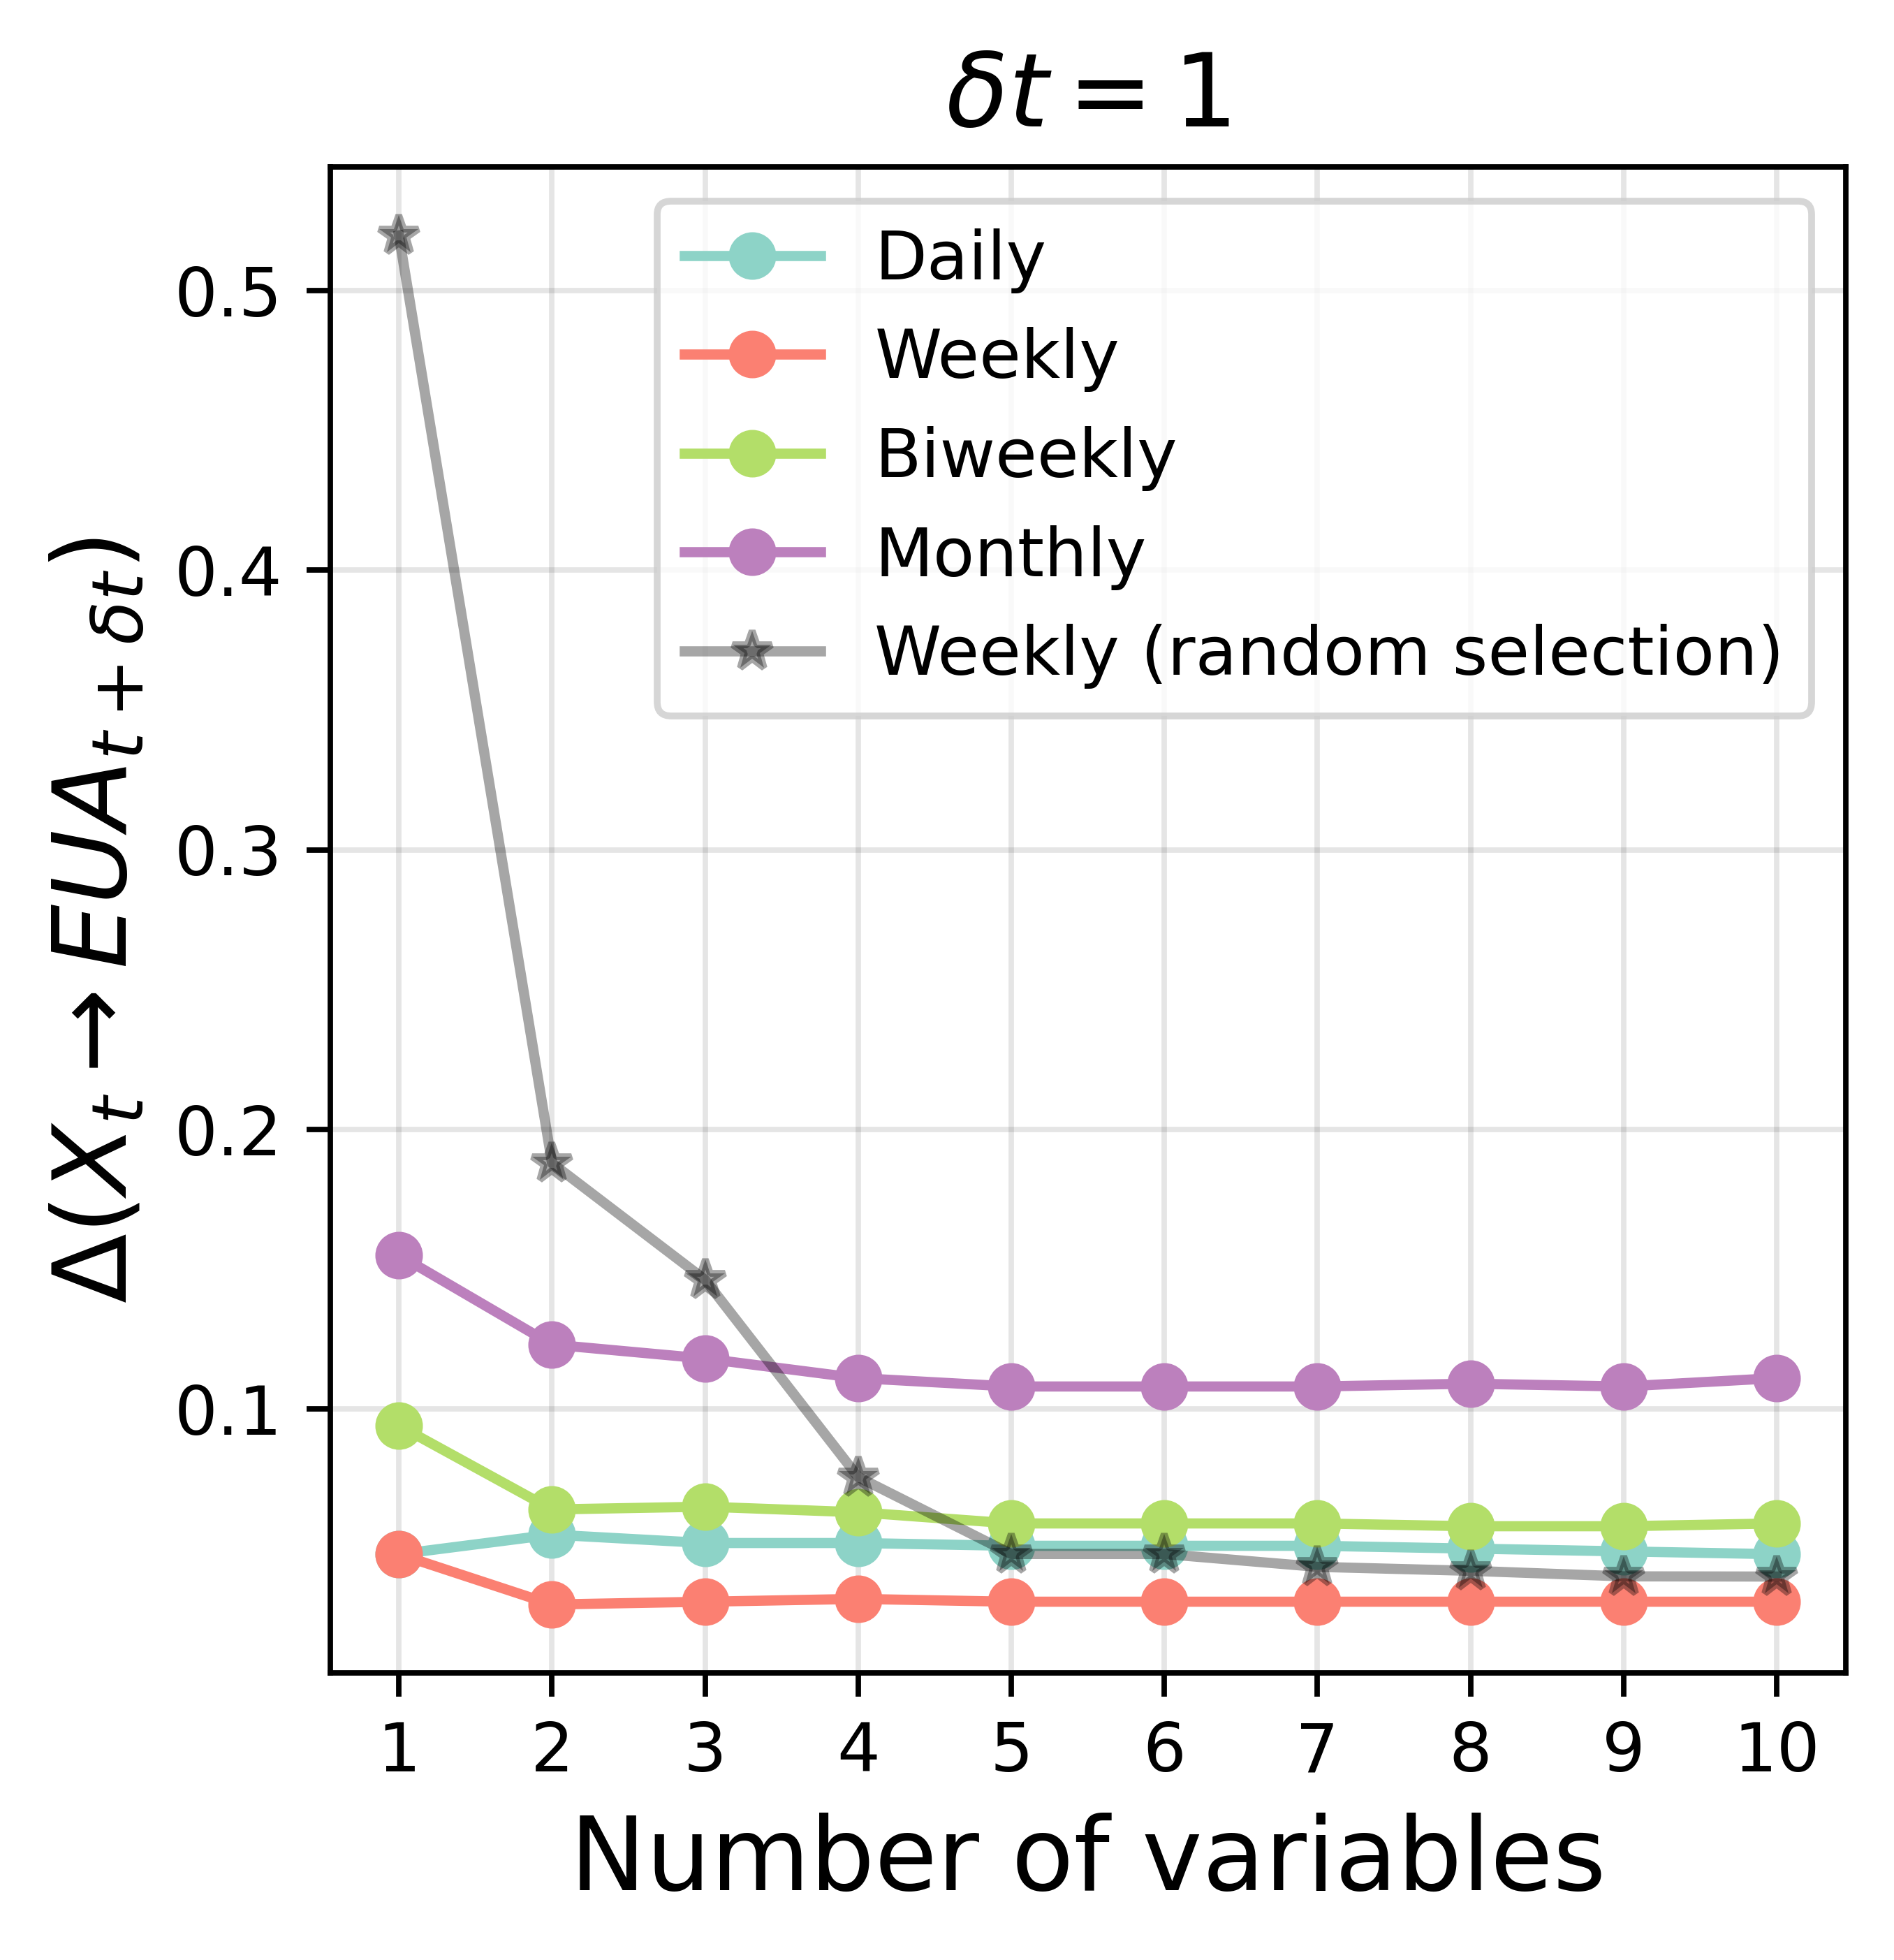

<Figure size 640x480 with 0 Axes>

In [23]:
fig, ax = plt.subplots(figsize=(4, 4), dpi = 700)
for i, best_imbs_2 in enumerate(best_imbs_list_2):
    plt.plot(np.arange(1, 11, 1), best_imbs_2[0:10, 1], "-o", label = file_labels[i], color = color_scale[i])
plt.plot(np.arange(1, 11, 1), mean_imb, '*-', color='black', label="Weekly (random selection)", alpha=0.35)
plt.legend()
ax.set_xlabel("Number of variables", fontsize = 15)
ax.set_ylabel(r'$\Delta(X_{t} \rightarrow EUA_{t+\delta t})$', fontsize=15)
plt.title(r'$\delta t = 1$', fontsize=15)
plt.grid(axis='both',color="black", alpha=.1)
ax.set_xticks(np.arange(1, 11, 1))
plt.show()
plt.savefig("../Figures/Fig7_1_2_TimeScaleSelection.pdf")


***

## 5.2 Selection of predictor variables

In [ ]:
%reset -f